The goal of this notebook is to prove Theorem 6.3. 

We want to compute all the curves $C_8$ of degree $8$ in $\mathbb{P}^2$ having six $E_6$ points and invariant by an involution $\Phi:\mathbb{P}^2\to\mathbb{P}^2$. It is known that in that case two of the singular points are in the line $L_1$ of fixed points by $\Phi$, the isolated fixed point is not in $C$, and the remaining singular points are in two orbits. Let 
$$
\pi:\mathbb{P}^2\to\mathbb{P}^2/\Phi=\mathbb{P}^2_\omega,\qquad\omega=(1,1,2).
$$
Actually the quotient has an orbifold structure where the points in the line $2$-curve $L=\pi(C)$ are orbifold point. Let $C:=\pi(C_8)$.
Hence we look for all the curves $C$ of degree $8$ in $\mathbb{P}^2_\omega$, $\omega=(1,1,2)$, having two cusps and two $E_6$ points (not passing through the singular point of the weighted projective plane), and such that there is a curve of degree $2$ tangent to the cusps.

Some of the computations may be skipped if ``verif = False``. It can be changed at any time.

We start fixing some rings to work with.

In [1]:
verif = False
R0 = PolynomialRing(QQ, 'a', 26)
R0.inject_variables(verbose=False)
R1.<x, y, z> = R0[]
R2.<u, v> = R0[]

Some helpful functions are loaded; they are documented in the file.

In [2]:
load('functions/functions.sage')

We start with a generic polynomial of $\omega$-degree $8$, monic in $z^4$, since the curve does not pass throught the singular point

In [3]:
VC = vector((1, ) + R0.gens()[: 24])
VM = vector(x^i * y^j * z^k for i in range(9) for j in range(9 - i) for k in range(floor((8 - i - j) / 2) + 1) if i + j + 2 * k == 8)
f = VC * VM
f

a23*x^8 + a22*x^7*y + a21*x^6*y^2 + a19*x^5*y^3 + a17*x^4*y^4 + a14*x^3*y^5 + a11*x^2*y^6 + a7*x*y^7 + a3*y^8 + a20*x^6*z + a18*x^5*y*z + a16*x^4*y^2*z + a13*x^3*y^3*z + a10*x^2*y^4*z + a6*x*y^5*z + a2*y^6*z + a15*x^4*z^2 + a12*x^3*y*z^2 + a9*x^2*y^2*z^2 + a5*x*y^3*z^2 + a1*y^4*z^2 + a8*x^2*z^3 + a4*x*y*z^3 + a0*y^2*z^3 + z^4

We impose that the cusps are at $[1:0:0]_\omega$ and $[0:1:0]_\omega$, and tangent to $z=z+a_{24}x y$. It has been experienced it is more effective than supposing this curve to be $z=0$.

In [4]:
f1 = f(x=u, y=1, z=v + a24 * u)
L = [f1.monomial_coefficient(u^i * v^j) for i, j in f1.exponents() if 2 * i + 3 * j < 6]
GL = R0.ideal(L).groebner_basis()

In [5]:
f = f.map_coefficients(lambda _: _.reduce(GL))
f1 = f(x=u, y=1, z=v + a24 * u)
L = [f1.monomial_coefficient(u^i * v^j) for i, j in f1.exponents() if 2 * i + 3 * j < 6]
print(L)

[a1*a24^2 + a6*a24 + a11, 2*a1*a24 + a6]


In [6]:
f = f.map_coefficients(lambda _: _.subs(a6=-2 * a1 * a24))
f1 = f(x=u, y=1, z=v + a24 * u)
L = [f1.monomial_coefficient(u^i * v^j) for i, j in f1.exponents() if 2 * i + 3 * j < 6]
print(L)

[-a1*a24^2 + a11]


In [7]:
f = f.map_coefficients(lambda _: _.subs(a11=a1 * a24^2))
f1 = f(x=u, y=1, z=v + a24 * u)
L = [f1.monomial_coefficient(u^i * v^j) for i, j in f1.exponents() if 2 * i + 3 * j < 6]
print(L)

[]


Once these conditions have been solved, we check that we have the right Newton polygon and then we continue with the other cusp.

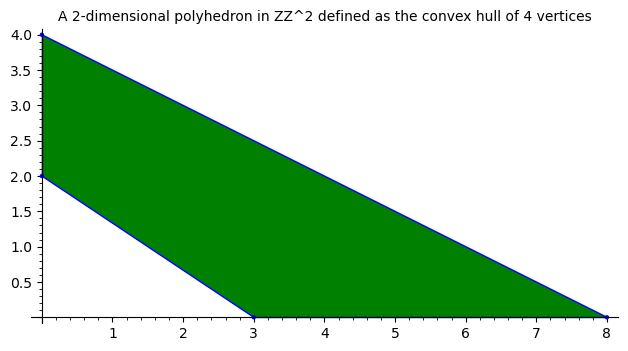

In [8]:
f1.newton_polytope()

In [9]:
f2 = f(x=1, y=u, z=v + a24 * u)
L = [f2.monomial_coefficient(u^i * v^j) for i, j in f2.exponents() if 2 * i + 3 * j < 6]
GL = R0.ideal(L).groebner_basis()

In [10]:
GL

[a18^2 - 4*a15*a21, a15*a24 + 1/2*a18, a18*a24 + 2*a21, a20, a22, a23]

In [11]:
f = f.map_coefficients(lambda _: _.reduce(GL))
f2 = f(x=1, y=u, z=v + a24 * u)
L = [f2.monomial_coefficient(u^i * v^j) for i, j in f2.exponents() if 2 * i + 3 * j < 6]
GL = R0.ideal(L).groebner_basis()
GL

[a18^2 - 4*a15*a21, a15*a24 + 1/2*a18, a18*a24 + 2*a21]

In [12]:
f = f.map_coefficients(lambda _:_.subs(a21=-a18 * a24 / 2))
f2 = f(x=1, y=u, z=v + a24 * u)
L = [f2.monomial_coefficient(u^i * v^j) for i, j in f2.exponents() if 2 * i + 3 * j < 6]
print(L)

[a15*a24^2 + 1/2*a18*a24, 2*a15*a24 + a18]


In [13]:
f = f.map_coefficients(lambda _: _.subs(a18=-2 * a15 * a24))
f2 = f(x=1, y=u, z=v + a24 * u)
L = [f2.monomial_coefficient(u^i * v^j) for i, j in f2.exponents() if 2 * i + 3 * j < 6]
print(L)

[]


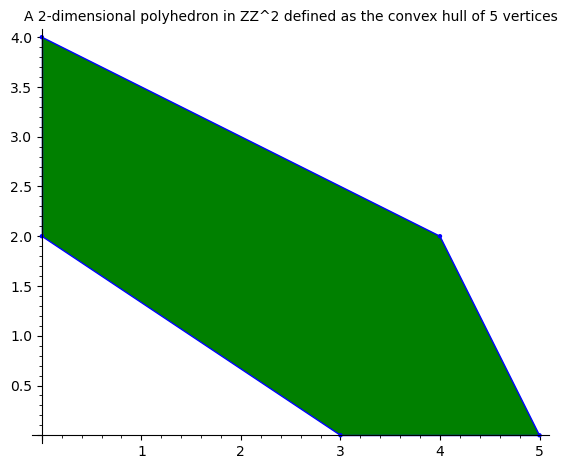

In [14]:
f2.newton_polytope()

We simplify the coefficent ring since we need much less coefficients.

In [15]:
lvrs = lvr(f.coefficients()) + [a2]
lvrs.sort()
R0 = PolynomialRing(QQ, lvrs)
R0.inject_variables(verbose=False)
R1.<x, y, z> = R0[]
R2.<u, v> = R0[]
f = R1(f)

The next goal is to impose an $\mathbb{E}_6$-point at $[1:1:0]_\omega$. The list ``L`` is started with the annihilation
of the derivatives up to order $3$; then the condition for the tangent cone to be a third power is added.

In [16]:
f3 = f(x=u + 1, y=1, z=v)
L = [f3.monomial_coefficient(u^i * v^j) for i, j in f3.exponents() if i + j < 3]
cs = [f3.monomial_coefficient(u^i * v^(3 - i)) for i in (0 .. 3)]
L += [9 * cs[0] * cs[3] - cs[1] * cs[2], 3 * cs[0] * cs[2] - cs[1]^2, 3 * cs[1] * cs[3] - cs[2]^2]
len(L)

9

We do the same at $[a_2:1:1]_\omega$.

In [17]:
f4 = f(x =u + a2, y=1, z=v + 1)
L += [f4.monomial_coefficient(u^i * v^j) for i, j in f4.exponents() if i + j < 3]
cs = [f4.monomial_coefficient(u^i * v^(3 - i)) for i in (0 .. 3)]
L += [9 * cs[0] * cs[3] - cs[1] * cs[2], 3 * cs[0] * cs[2] - cs[1]^2, 3 * cs[1] * cs[3] - cs[2]^2]
len(L)

18

We need to solve this system, unfortunately is not possible to do it directly. The procedure has been explained in the notebook for the curves invariant by an involution of order $3$ and also in the Appendix A.

In [18]:
Ls = [L]

In [19]:
for i, vr in [(0, a14), (4, a17), (2, a19), (1, a1), (1, a10), (0, a13), (5, a0), (4, a4), (3, a8), (3, a16)]:
    Ls, L1, Lf = reducir_paso(Ls, i, vr)

(1, 0, 4, 1)
Number of variables:  15
Number of equations 17
(1, 0, 3, 1)
Number of variables:  14
Number of equations 16
(1, 0, 2, 1)
Number of variables:  13
Number of equations 15
(1, 0, 4, 1)
Number of variables:  12
Number of equations 14
(1, 0, 5, 1)
Number of variables:  11
Number of equations 13
(1, 0, 5, 1)
Number of variables:  10
Number of equations 12
(1, 0, 11, 1)
Number of variables:  9
Number of equations 11
(1, 0, 21, 1)
Number of variables:  8
Number of equations 10
(1, 0, 31, 1)
Number of variables:  7
Number of equations 9
(1, 3, 33, 3)
Number of variables:  6
Number of equations 8
1 0 a2 - 1
1 1 number of terms:  505
3 0 a2
3 1 a2 - 1
3 2 number of terms:  55
4 0 a2
4 1 a2 - 1
4 2 number of terms:  56
5 0 a2
5 1 a2 - 1
5 2 2*a2 - 1
5 3 number of terms:  421
6 0 a2
6 1 a2 - 1
6 2 2*a2 - 1
6 3 number of terms:  358


The cases $a_2=0,1$ are easily discarded. We eliminate them.

In [20]:
for j in (1, 3, 4):
    Lf[j] = Lf[j][-1: ]
for j in (5, 6):
    Lf[j] = Lf[j][-2: ]

In [21]:
Ls0, Ls1, Ls2, Ls3 = nuevos(Ls, Lf)

In [22]:
res = reducir_paso(Ls3, 3, a9)

(1, 8, 42, 13)
Number of variables:  5
Number of equations 7
No solution


Then, $a_2=\frac{1}{2}$ is also discarded, and we restrict our attention to the first list of lists.

In [23]:
Ls, L1, Lf = reducir_paso(Ls0, 3, a9)

(1, 8, 42, 13)
Number of variables:  5
Number of equations 7
1 0 a2 - 1
1 1 number of terms:  618
3 0 a2 - 1
3 1 number of terms:  53
5 0 a2 - 1
5 1 number of terms:  581


We discard again the case $a_2=1$.

In [24]:
Ls[-1]= [_[-1] for _ in Lf]

In [25]:
for i, vr in [(3, a12), (2, a5)]:
    Ls, L1, Lf = reducir_paso(Ls, i, vr)

(1, 7, 46, 7)
Number of variables:  4
Number of equations 6
(2, 12, 185, 7)
Number of variables:  3
Number of equations 5
0 0 a24
0 1 a2
0 2 number of terms:  11
0 3 number of terms:  229
1 0 a2
1 1 number of terms:  24
1 2 number of terms:  229
2 0 a24
2 1 a2
2 2 number of terms:  488
3 0 a24
3 1 a2
3 2 number of terms:  370


We discard the cases $a_2=0$ and $a_{24}=0$. 

In [26]:
for j in (0, 1):
    Lf[j] = Lf[j][-2: ]
for j in (2, 3):
    Lf[j] = Lf[j][-1: ]

In [27]:
Ls0, Ls1, Ls2, Ls3 = nuevos(Ls, Lf)

In [28]:
Ls3, L1, Lf = reducir_paso(Ls3, 0, a15)

(1, 8, 1, 10)
Number of variables:  2
Number of equations 4
0 0 a2 + 1
0 1 2*a24*a2 - 1
0 2 3*a24*a2 - 2
1 0 number of terms:  16
1 1 number of terms:  23
2 0 number of terms:  9
2 1 number of terms:  18
3 0 number of terms:  24
3 1 number of terms:  31


In [29]:
fcts = []
for u in cartesian_product(Lf):
    CT1 = rslt([(u[0], v, a24) for v in u[1: ]])
    T1 = [b[1] for b in CT1]
    u = gcd(T1).factor()
    fcts += [_[0] for _ in u]
fcts = list(Set(fcts))
fcts.sort()
fcts

[a2, a2 + 1]

The case $a_2=0$ is not allowed. Let us check for $a_2=-1$.

In [30]:
for U in [-1]:
    print(gcd([_(a2=U) for _ in Ls3[-2]]).factor())

1


In [31]:
Ls2, L1, Lf = reducir_paso(Ls2, 0, a15)

(1, 8, 1, 10)
Number of variables:  2
Number of equations 4
0 0 a2 + 1
0 1 2*a24*a2 - 1
0 2 number of terms:  10
1 0 number of terms:  16
1 1 number of terms:  23
2 0 number of terms:  9
2 1 number of terms:  18
3 0 number of terms:  24
3 1 number of terms:  31


In [32]:
fcts = []
for u in cartesian_product(Lf):
    CT1 = rslt([(u[0], v, a24) for v in u[1: ]])
    T1 = [b[1] for b in CT1]
    u = gcd(T1).factor()
    fcts += [_[0] for _ in u]
fcts = list(Set(fcts))
fcts.sort()
fcts

[a2, a2 - 1, a2 + 1]

In [33]:
for U in [-1]:
    print(gcd([_(a2=U) for _ in Ls2[-2]]).factor())

1


In [34]:
Ls1, L1, Lf = reducir_paso(Ls1, 1, a15)

(1, 13, 4, 20)
Number of variables:  2
Number of equations 4
0 0 a2 + 1
0 1 2*a24*a2 - 1
0 2 a24*a2 - 1
0 3 number of terms:  10
0 4 number of terms:  20
1 0 number of terms:  30
1 1 number of terms:  50
2 0 number of terms:  19
2 1 number of terms:  42
3 0 number of terms:  39
3 1 number of terms:  61


In [35]:
fcts = []
for u in cartesian_product(Lf):
    CT1 = rslt([(u[0], v, a24) for v in u[1: ]])
    T1 = [b[1] for b in CT1]
    u = gcd(T1).factor()
    fcts += [_[0] for _ in u]
fcts = list(Set(fcts))
fcts.sort()
fcts

[a2, a2 - 1, a2 + 1]

In [36]:
for U in [-1]:
    print(gcd([_(a2=U) for _ in Ls1[-2]]).factor())

1


We are restricted to only one case.

In [37]:
Ls, L1, Lf = reducir_paso(Ls0, 0, a15)

(3, 32, 141, 88)
Number of variables:  2
Number of equations 3
0 0 number of terms:  194
0 1 number of terms:  386
1 0 number of terms:  135
1 1 number of terms:  319
2 0 number of terms:  250
2 1 number of terms:  487


This computation can be skipped, it may take
```
CPU times: user 137 ms, sys: 110 ms, total: 248 ms
Wall time: 32.3 s
```

In [38]:
verif = False
if verif:
    fcts = []
    for u in cartesian_product(Lf):
        CT1 = rslt([(u[0], v, a24) for v in u[1: ]])
        T1 = [b[1] for b in CT1]
        u = gcd(T1).factor()
        fcts += [_[0] for _ in u]
    fcts = list(Set(fcts))
    fcts.sort()
    save(fcts, 'files2/cnd-2')
else:
    fcts = load('files2/cnd-2.sobj')
for j, p in enumerate(fcts):
    if p.degree() <= 2:
        print("The polynomial in position", j, "is", p)
    else:
        print("The degree of the polynomial in position", j, "is", p.degree())

The polynomial in position 0 is a2
The polynomial in position 1 is a2 - 1
The polynomial in position 2 is a2 + 1
The polynomial in position 3 is 27*a2^2 - 10*a2 + 27
The degree of the polynomial in position 4 is 4
The degree of the polynomial in position 5 is 32


We start checking the case $a_2=-1$.

In [39]:
for U in [-1]:
    print(gcd([_(a2=U) for _ in Ls1[-2]]).factor())

1


We check now the field of index $4$:

In [40]:
Rs.<s> = QQ[]
p1 = fcts[-2](a2=s)
K1.<aa2> = NumberField(p1)

In [41]:
RK0 = R0.change_ring(K1)
RK0.inject_variables(verbose=False)
Lsa = [[RK0(p) for p in L] for L in Ls]
sb1 = {a2: aa2}
j = -1
for vr in (a24, a15):
    qq = [_[0] for _ in gcd([RK0(_).subs(sb1) for _ in Ls[j]]).factor()]
    if qq == []:
        print("No solution")
        break
    else:
        sb1[vr] = K1(vr.reduce(qq))
        j += -1

No solution


The case of index $32$ takes several hours to give no solution. The following code shows this fact.
```
K1, RK0, Lsa = load('grado32-2.sobj')
RK0.inject_variables(verbose=False)
K1.inject_variables(verbose=False)
sb1 = {a2: aa2}
j = -1
for vr in (a24, a15, a5):
    qq = [_[0] for _ in gcd([_.subs(sb1) for _ in Lsa[j]]).factor()]
    if qq == []:
        print("No solution")
        break
    else:
        sb1[vr] = K1(vr.reduce(qq))
        j += -1
```

In [42]:
Rs.<s> = QQ[]
p1 = fcts[1](a2=s)
K1.<aa2> = NumberField(p1)
save((K1, RK0, Lsa), 'files2/grado32-2.sobj')

Only one case has to be checked, the field of index $2$. The data are saved.

In [43]:
Rs.<s> = QQ[]
p1 = fcts[3](a2=s)
K1.<aa2> = NumberField(p1)

In [44]:
RK0 = R0.change_ring(K1)
RK0.inject_variables(verbose=False)
Lsa = [[RK0(p) for p in L] for L in Ls]
sb1 = {a2: aa2}
j = -1
for vr in (a24, a15, a5, a12, a9, a16, a8, a4, a0, a13, a10, a1, a19, a17, a14):
    qq = [_[0] for _ in gcd([_.subs(sb1) for _ in Lsa[j]]).factor()]
    if qq == []:
        print("No solution")
        break
    else:
        sb1[vr] = K1(vr.reduce(qq))
        j += -1

With this data we can construct the polynomial over a field $K_1$ of index $2$.

In [45]:
cfs = [K1(RK0(_).subs(sb1)) for _ in f.coefficients()]
RK1.<x, y, z> = K1[]
SK1.<u, v> = K1[]
f1 = vector(cfs) * vector([x^i * y^j * z^k for i, j, k in f.exponents()])

Let us see the result.

In [46]:
f1

(322741/12702096*aa2 - 6563615/171478296)*x^6*y^2 + (-84947/2117016*aa2 + 446695/5196312)*x^5*y^3 + (-16975/529254*aa2 - 1613705/57159432)*x^4*y^4 + (526441/6351048*aa2 - 8286115/171478296)*x^3*y^5 + (-629/17424*aa2 + 3395/117612)*x^2*y^6 + (3395/29403*aa2 + 322741/3175524)*x^5*y*z + (10951/58806*aa2 - 852361/1587762)*x^4*y^2*z + (-45917/58806*aa2 + 495670/793881)*x^3*y^3*z + (10607/19602*aa2 - 23693/529254)*x^2*y^4*z + (-15/242*aa2 - 629/4356)*x*y^5*z + (-629/4356*aa2 + 3395/29403)*x^4*z^2 + (16003/13068*aa2 + 103139/352836)*x^3*y*z^2 + (-2305/3267*aa2 - 289969/176418)*x^2*y^2*z^2 + (-787/1452*aa2 + 50881/39204)*x*y^3*z^2 + (81/484*aa2 - 15/242)*y^4*z^2 + (-85/198*aa2 + 4495/5346)*x^2*z^3 + (2*aa2 - 20/27)*x*y*z^3 + (-15/22*aa2 - 85/198)*y^2*z^3 + z^4

We compute the tangent cone at a cusp.

In [47]:
g1 = f1(x=1, y=u, z=v)
sum(a*b for a, b in g1 if b.degree() == 2).factor()

((322741/12702096*aa2 - 6563615/171478296)) * (u + (-2*aa2)*v)^2

We make a suitable change of variables, such that $z=0$ is the common tangent $2$-curve at the cusps.

In [48]:
f2 = f1(z=z + x*y/2/aa2)
gx = f2(x=1, y=u, z=v)
gy = f2(x=u, y=1, z=v)
sum(a*b for a, b in gx if b.degree() == 2).factor(), sum(a*b for a, b in gy if b.degree() == 2).factor()

(((-629/4356*aa2 + 3395/29403)) * v^2, ((81/484*aa2 - 15/242)) * v^2)

Let us look for the coordinates of the $\mathbb{E}_6$, singularities. The only automorphism of $K_1$ is the complex conjugation. We look for a change of variables such that the polynomial has rational coefficients.

In [49]:
f2.discriminant(z).factor()

((-8562881155418812386589/64348236132735668471087202*aa2 + 2650127952029871421281563/19111426131422493535912898994)) * y^3 * x^3 * (x + (-aa2)*y)^8 * (x - y)^8 * (x^2 + (9/2*aa2 + 9/2)*x*y + aa2*y^2)

In [50]:
h1 = K1.automorphisms()[1]

We look for the diagonal factors that will avoid the field $K_1$.

In [51]:
aa2*(u*aa2 + v) - (u*aa2 + v).map_coefficients(h1)

(37/27*aa2 - 37/27)*u + (aa2 - 1)*v

In [52]:
h1(aa2*(27*aa2 - 37))

27*aa2 - 37

In [53]:
h1(27*aa2 + 27)

-27*aa2 + 37

In [54]:
f3 = f2(y=y*(27*aa2 - 37))
f3.discriminant(z).factor()

((940447687673657153899540480/353915298730046176590979611*aa2 + 111744910791518455416902309888/9555713065711246767956449497)) * y^3 * x^3 * (x + (-27*aa2 + 37)*y)^8 * (x + (27*aa2 + 27)*y)^8 * (x^2 - 288*x*y + 1728*y^2)

In [55]:
f3.discriminant(y).factor()

((222250204291566883686205114461125360011040018079982682437682473621163868160/84691693590553674074496416886812218599536240797713*aa2 - 928098003467731519459995694611290902533184473619934136870580095498286268416/2286675726944949200011403255943929902187478501538251)) * z^4 * (x^2 + (-17/132*aa2 - 9/44)*z) * (x^2 + (17/11*aa2 + 27/11)*z) * (x^2 + (2*aa2)*z)^8 * (x^2 + (-20/27*aa2 + 2)*z)^8

In [56]:
aa2*(u*aa2 + v) - ((1-10/27*aa2)*(u*aa2 + v)).map_coefficients(h1)

(899/729*aa2 - 33263/19683)*u + (17/27*aa2 - 629/729)*v

In [57]:
aa2*(27 * 17 * aa2 - 899) - h1((27 * 17 * aa2 - 899)*(1-10/27*aa2))

0

In [58]:
f4 = f3(z=z*(27 * 17 * aa2 - 899))
f4 = f4/f4.monomial_coefficient(z^4)
f4

-64/6366131739*x^5*y^3 - 592/707347971*x^4*y^4 - 4096/235782657*x^3*y^5 - 2/7144929*x^4*y^2*z + 128/264627*x^2*y^4*z + 1/5174928*x^4*z^2 - 16/2910897*x^3*y*z^2 - 784/970299*x^2*y^2*z^2 - 1024/107811*x*y^3*z^2 + 768/1331*y^4*z^2 - 5/5346*x^2*z^3 + 160/99*y^2*z^3 + z^4

The coefficients are two complicated, let us try to simplify them.

In [59]:
f5 = f4(x=2*x, y=y/4/3, z=z/81/11)
f5 = f5/f5.monomial_coefficient(z^4)
f5

-352/3*x^5*y^3 - 407*x^4*y^4 - 352*x^3*y^5 - 22*x^4*y^2*z + 66*x^2*y^4*z + 27/11*x^4*z^2 - 32/11*x^3*y*z^2 - 196/11*x^2*y^2*z^2 - 96/11*x*y^3*z^2 + 243/11*y^4*z^2 - 10/3*x^2*z^3 + 10*y^2*z^3 + z^4

In [60]:
f5

-352/3*x^5*y^3 - 407*x^4*y^4 - 352*x^3*y^5 - 22*x^4*y^2*z + 66*x^2*y^4*z + 27/11*x^4*z^2 - 32/11*x^3*y*z^2 - 196/11*x^2*y^2*z^2 - 96/11*x*y^3*z^2 + 243/11*y^4*z^2 - 10/3*x^2*z^3 + 10*y^2*z^3 + z^4

In [61]:
f6 = f5(x=x / 2)
f6

-11/3*x^5*y^3 - 407/16*x^4*y^4 - 44*x^3*y^5 - 11/8*x^4*y^2*z + 33/2*x^2*y^4*z + 27/176*x^4*z^2 - 4/11*x^3*y*z^2 - 49/11*x^2*y^2*z^2 - 48/11*x*y^3*z^2 + 243/11*y^4*z^2 - 5/6*x^2*z^3 + 10*y^2*z^3 + z^4

In [62]:
save(f6.change_ring(QQ), 'files2/octica-sim2-rational')